# Python Diagrams

In [ ]:
!pip install diagrams

     |████████████████████████████████| 23.2 MB 76.4 MB/s 
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1


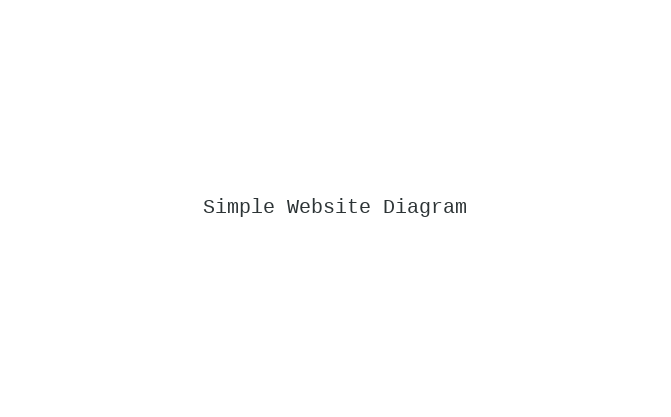

In [ ]:
from diagrams import Diagram
diag = Diagram("Simple Website Diagram")
diag

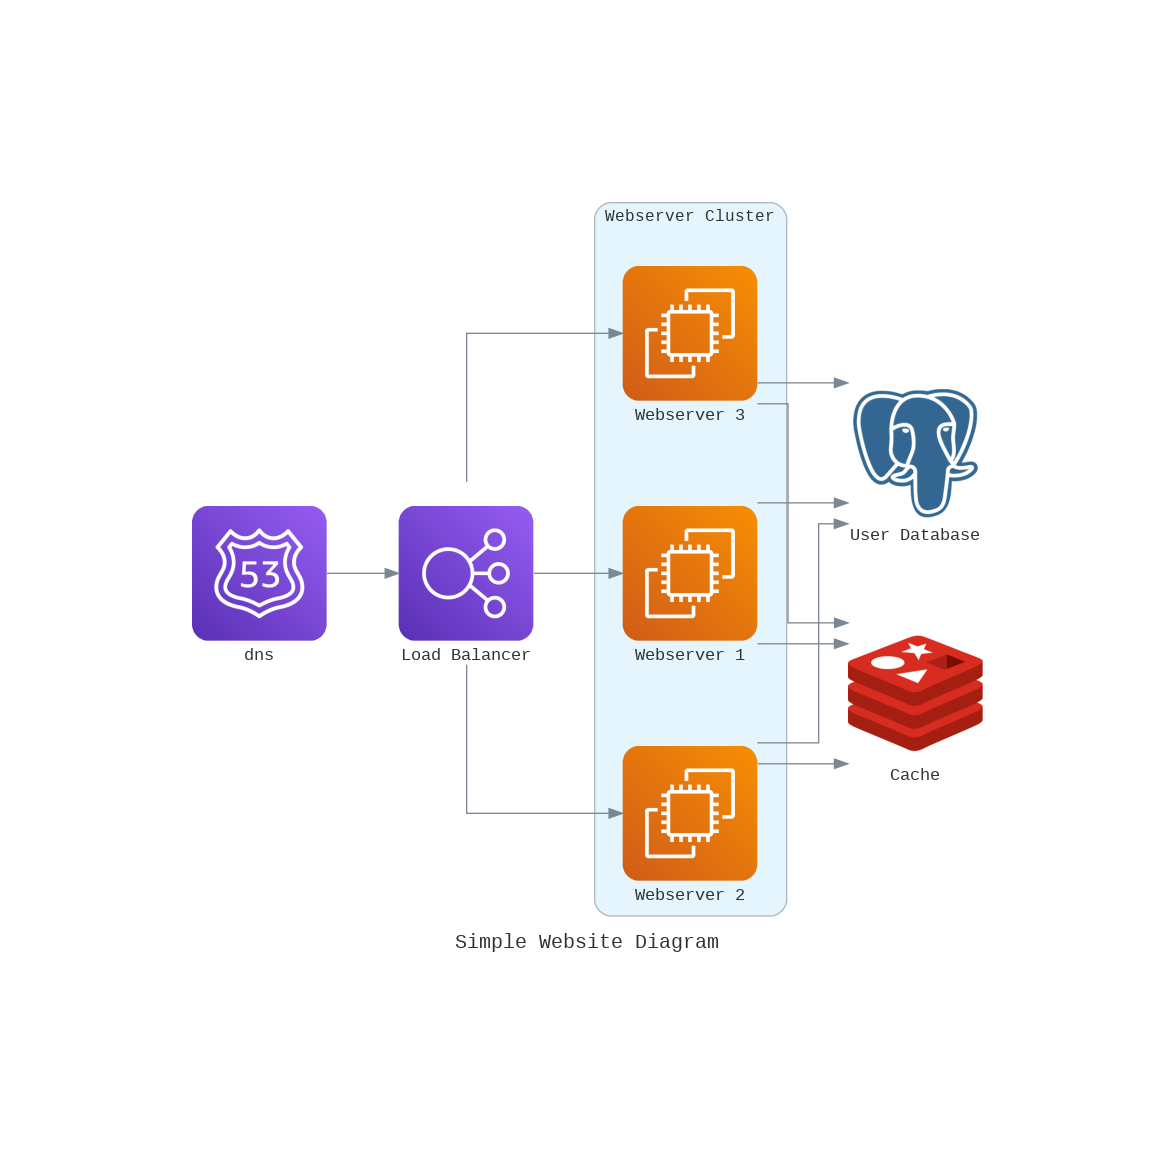

In [ ]:
from diagrams import Diagram, Cluster
from diagrams.aws.compute import EC2
from diagrams.aws.network import ELB
from diagrams.aws.network import Route53
from diagrams.onprem.database import PostgreSQL # Would typically use RDS from aws.database
from diagrams.onprem.inmemory import Redis # Would typically use ElastiCache from aws.database

with Diagram("Simple Website Diagram", direction='LR') as diag: # It's LR by default, but you have a few options with the orientation
    dns = Route53("dns")
    load_balancer = ELB("Load Balancer")
    database = PostgreSQL("User Database")
    cache = Redis("Cache")
    with Cluster("Webserver Cluster"):
        svc_group = [EC2("Webserver 1"),
                    EC2("Webserver 2"),
                    EC2("Webserver 3")]
    dns >> load_balancer >> svc_group
    svc_group >> cache
    svc_group >> database
diag

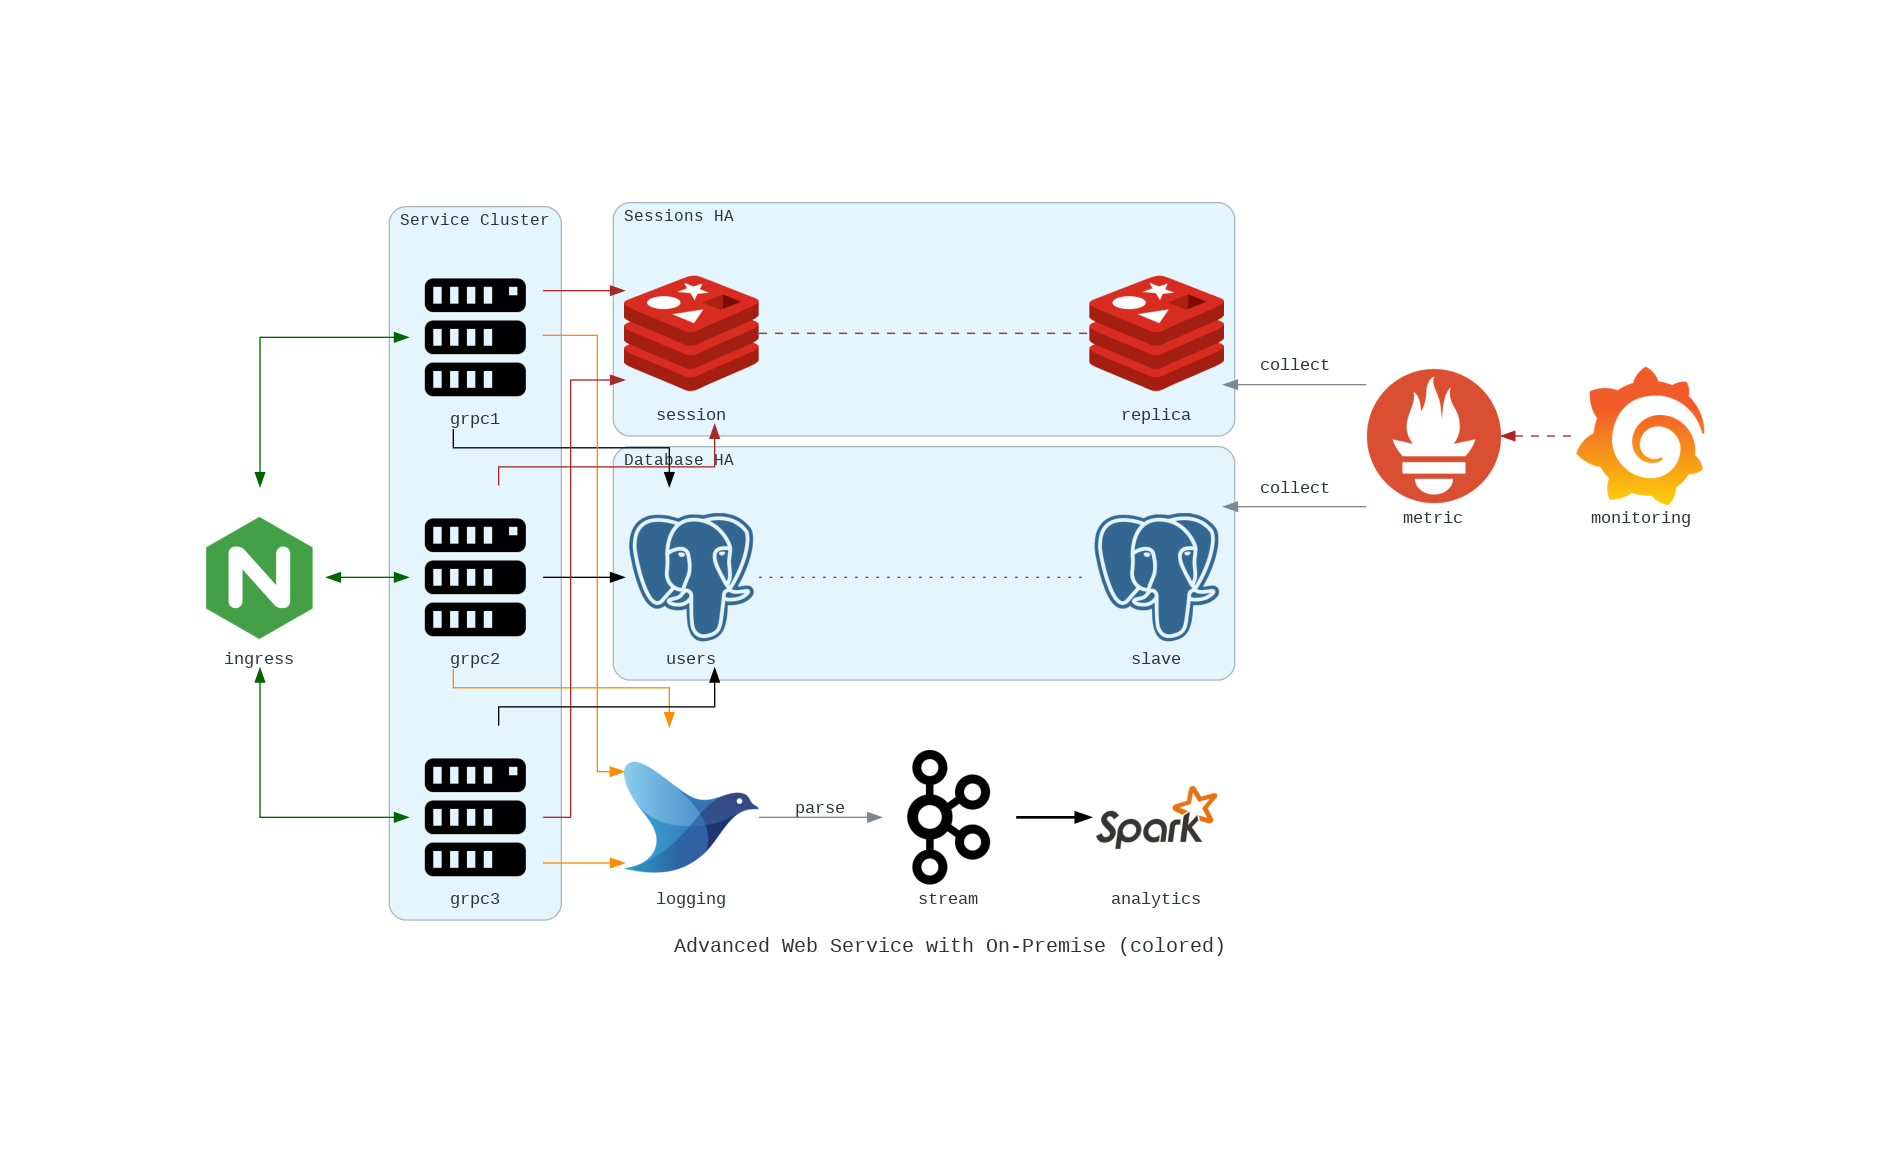

In [ ]:
from diagrams import Cluster, Diagram, Edge
from diagrams.onprem.analytics import Spark
from diagrams.onprem.compute import Server
from diagrams.onprem.database import PostgreSQL
from diagrams.onprem.inmemory import Redis
from diagrams.onprem.logging import Fluentd
from diagrams.onprem.monitoring import Grafana, Prometheus
from diagrams.onprem.network import Nginx
from diagrams.onprem.queue import Kafka

with Diagram(name="Advanced Web Service with On-Premise (colored)", show=False) as diag:
    ingress = Nginx("ingress")

    metrics = Prometheus("metric")
    metrics << Edge(color="firebrick", style="dashed") << Grafana("monitoring")

    with Cluster("Service Cluster"):
        grpcsvc = [
            Server("grpc1"),
            Server("grpc2"),
            Server("grpc3")]

    with Cluster("Sessions HA"):
        master = Redis("session")
        master - Edge(color="brown", style="dashed") - Redis("replica") << Edge(label="collect") << metrics
        grpcsvc >> Edge(color="brown") >> master

    with Cluster("Database HA"):
        master = PostgreSQL("users")
        master - Edge(color="brown", style="dotted") - PostgreSQL("slave") << Edge(label="collect") << metrics
        grpcsvc >> Edge(color="black") >> master

    aggregator = Fluentd("logging")
    aggregator >> Edge(label="parse") >> Kafka("stream") >> Edge(color="black", style="bold") >> Spark("analytics")

    ingress >> Edge(color="darkgreen") << grpcsvc >> Edge(color="darkorange") >> aggregator

diag

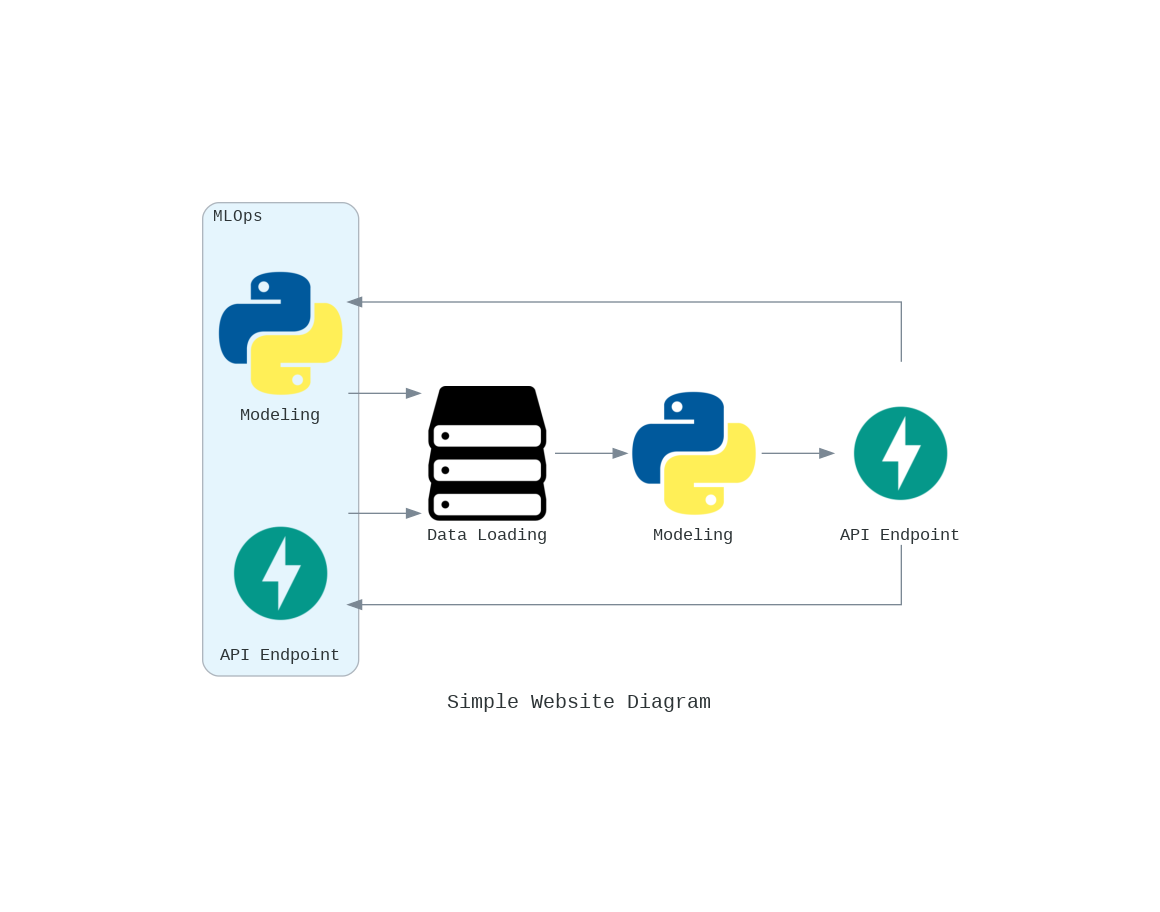

In [ ]:
from diagrams import Diagram, Cluster
from diagrams.generic.storage import Storage
from diagrams.programming.language import Python
from diagrams.programming.framework import FastAPI
from diagrams.openstack.deployment import Helm


with Diagram("Simple Website Diagram", direction='LR') as diag:
  data = Storage("Data Loading")
  code = Python("Modeling")
  serve = FastAPI("API Endpoint")

  with Cluster("MLOps"):
    mlops = [Python("Modeling"),
             FastAPI("API Endpoint")]

  data >> code >> serve
  serve >> mlops
  mlops >> data


diag

In [ ]:
!wget -O colab.png https://avatars.githubusercontent.com/u/33467679?s=280&v=4

--2021-07-20 14:42:55--  https://avatars.githubusercontent.com/u/33467679?s=280
Resolving avatars.githubusercontent.com (avatars.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to avatars.githubusercontent.com (avatars.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9254 (9.0K) [image/png]
Saving to: ‘colab.png’

colab.png           100%[===================>]   9.04K  --.-KB/s    in 0s      

2021-07-20 14:42:56 (79.4 MB/s) - ‘colab.png’ saved [9254/9254]



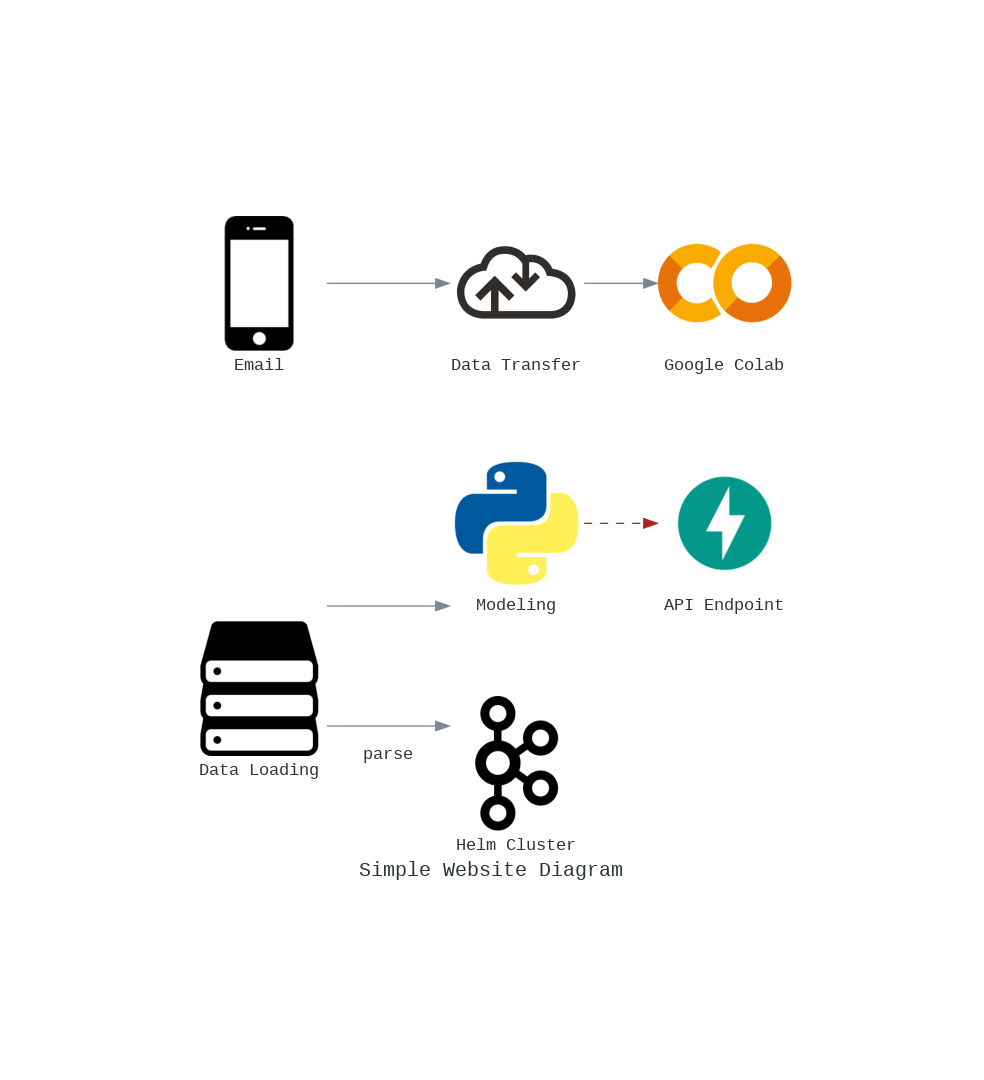

In [ ]:
!pip install diagrams

from diagrams import Diagram, Cluster, Edge
from diagrams.generic.storage import Storage
from diagrams.programming.language import Python
from diagrams.programming.framework import FastAPI
from diagrams.onprem.queue import Kafka
from diagrams.generic.device import Mobile
from diagrams.oci.storage import DataTransfer
from diagrams.custom import Custom

!wget -O colab.png https://avatars.githubusercontent.com/u/33467679?s=280&v=4

with Diagram("Simple Website Diagram", direction='LR', filename='diagram', graph_attr={"bgcolor": "transparent"}) as diag:
    data = Storage("Data Loading")
    code = Python("Modeling")
    serve = FastAPI("API Endpoint")
    helmc = Kafka("Helm Cluster")
    email = Mobile("Email")
    datatransfer = DataTransfer("Data Transfer")
    colab = Custom("Google Colab", "colab.png")
    data >> code
    code >> Edge(color="firebrick", style="dashed") >> serve
    data >> Edge(label="parse") >> helmc
    email >> datatransfer >> colab

diag

rectangle_blue.png  100%[===================>]   3.08K  --.-KB/s    in 0s      


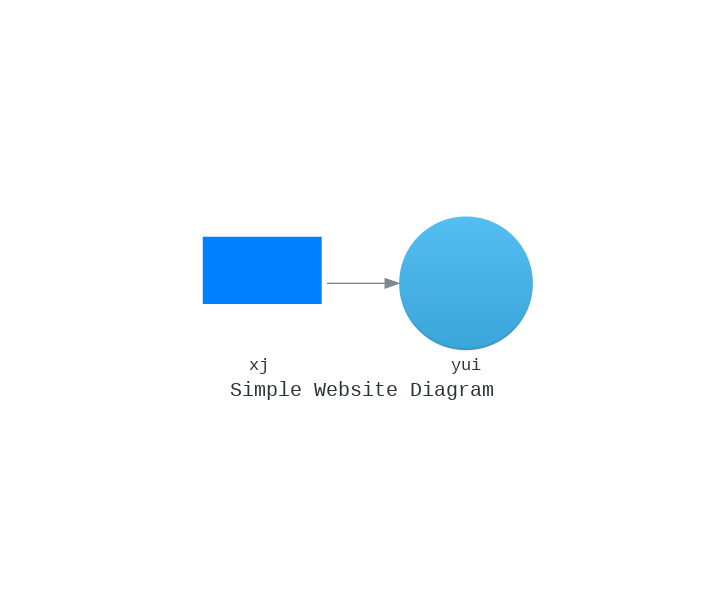

In [ ]:
from diagrams import Diagram
from diagrams.custom import Custom

!wget -q --show-progress -O circle_blue.png https://icons.iconarchive.com/icons/custom-icon-design/flatastic-6/512/Circle-icon.png
!wget -q --show-progress -O rectangle_blue.png http://www.downloadclipart.net/medium/33179-blue-rectangle-images.png

with Diagram("Simple Website Diagram", direction='LR', filename='diagram', graph_attr={"bgcolor": "transparent"}) as diag:
    yui = Custom("yui", "circle_blue.png")
    xj = Custom("xj", "rectangle_blue.png")
    xj >> yui

diag